In [2]:
import sys
sys.path.append("/usr/lib/python2.7/dist-packages")

In [3]:
import numpy            as np
import graph_tool.all as gt
import matplotlib.pyplot as plt

In [3]:
g = gt.load_graph("HIT.xml.gz")
pw = g.edge_properties["weight"]
Nnodes = g.num_vertices()
print "number of nodes ", g.num_vertices()
print "number of edges ", g.num_edges()
g.edge_properties["rw_weight"] = g.new_edge_property("float")
rw = g.edge_properties["rw_weight"]
#for e in g.edges():
#    iw[e] = 1./pw[e]
#g.save("HIT.xml.gz")

number of nodes  97980
number of edges  315333


# $$ Rescaling $$

In [53]:
for n in g.vertices():
    weight = 0.
    for e in n.out_edges():
        weight += pw[e]
    if weight >= 0:
        for e in n.out_edges():
            rw[e] = 1. - np.log(float(pw[e])/weight)
#g.save("HIT.xml.gz")

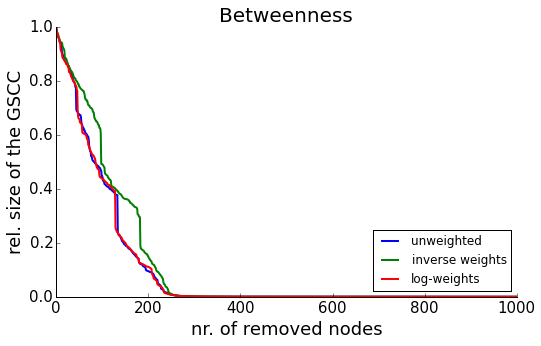

In [11]:
%matplotlib inline
centrality = {"unweighted": "betweenness_centrality_unweighted",
              "inverse weights": "betweenness_centrality_filtered",
              "log-weights": "betweenness_centrality_brockmann"}

fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0.15,0.15,0.8,0.75])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for cen in centrality.keys():
    size = np.load(centrality[cen]+".npz")['size'].astype(float)
    size /= size[0]
    ax.plot(range(len(size)),size,linewidth=2)
plt.title('Betweenness',{'size':20})
plt.legend(centrality, loc='lower right')
plt.xlabel('nr. of removed nodes',{'size':18})
plt.ylabel('rel. size of the GSCC',{'size':18})
plt.savefig('data/compare_betweenness',format='png')

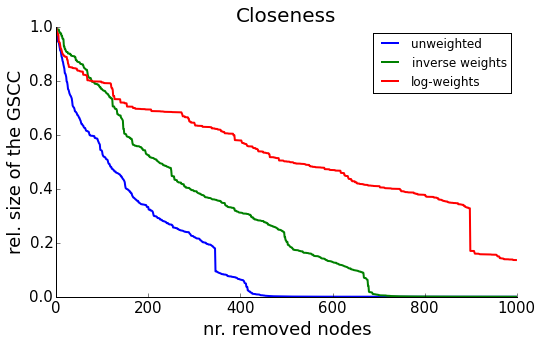

In [12]:
%matplotlib inline
centrality = {"unweighted": "closeness_centrality_unweighted",
              "inverse weights": "closeness_centrality_filtered",
              "log-weights": "closeness_centrality_brockmann"}

fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0.15,0.15,0.8,0.75])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for cen in centrality.keys():
    results = np.load(centrality[cen]+".npz")
    N = results['N']
    size = results['size'][0:N].astype(float)/results['size'][0]
    ax.plot(range(len(size)),size,linewidth=2)
plt.title('Closeness',{'size':20})
plt.legend(centrality, loc='upper right')
plt.xlabel('nr. removed nodes',{'size':18})
plt.ylabel('rel. size of the GSCC',{'size':18})
plt.savefig('data/compare_closeness',format='png')